#**Downloading Badminton_Shot_Identification.zip File**

In [ ]:
!gdown "https://drive.google.com/uc?export=download&id=1fRUOd20Q9GRFiQRvvfxJvWhDaeF6yRTd"

In [ ]:
!unzip /content/Badminton_Shot_Identification.zip

Archive:  /content/Badminton_Shot_Identification.zip
   creating: Badminton_Shot_Identification/models/
 extracting: Badminton_Shot_Identification/models/__init__.py  
   creating: Badminton_Shot_Identification/models/__pycache__/
  inflating: Badminton_Shot_Identification/models/__pycache__/__init__.cpython-36.pyc  
  inflating: Badminton_Shot_Identification/models/__pycache__/__init__.cpython-37.pyc  
  inflating: Badminton_Shot_Identification/models/__pycache__/__init__.cpython-39.pyc  
  inflating: Badminton_Shot_Identification/models/__pycache__/common.cpython-36.pyc  
  inflating: Badminton_Shot_Identification/models/__pycache__/common.cpython-37.pyc  
  inflating: Badminton_Shot_Identification/models/__pycache__/common.cpython-39.pyc  
  inflating: Badminton_Shot_Identification/models/__pycache__/experimental.cpython-36.pyc  
  inflating: Badminton_Shot_Identification/models/__pycache__/experimental.cpython-37.pyc  
  inflating: Badminton_Shot_Identification/models/__pycache__/e

#**Importing and Installing Required Libararies**

In [ ]:
!pip install mediapipe
!pip install keras
!pip install mediapipe opencv-python-headless matplotlib torch torchvision tensorflow
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, LayerNormalization
from tensorflow.keras.callbacks import TensorBoard

#**Creating a Virtual Window**

In [ ]:
!sudo apt-get clean
!sudo apt-get update

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [783 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2,053 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,081 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,635 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InReleas

In [ ]:
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 58 not upgraded.
Need to get 7,814 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:5 http://archiv

#**Updating the Pillow Library**

In [ ]:
!python -m pip install pillow --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 18.0 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.2.0 which is incompatible.


#**Downloading the Trained LSTM Model File From the Drive**

**You can skip training model again by running below commands**

In [ ]:
%cd /content/Badminton_Shot_Identification

/content/Badminton_Shot_Identification


In [ ]:
!gdown "https://drive.google.com/uc?export=download&id=1hj88idxd0pDUcpxXs5svsNCq-wfIAxmZ"

Downloading...
From: https://drive.google.com/uc?export=download&id=1hj88idxd0pDUcpxXs5svsNCq-wfIAxmZ
To: /content/Badminton_Shot_Identification/mmodelfinal.h5
100% 3.88M/3.88M [00:00<00:00, 198MB/s]


#**In the Below Cells only the Data is gathered for the Model Training Purpose**

**Find the Keypoints For Players**

In [ ]:
!gdown "https://drive.google.com/uc?export=download&id=10K2nUH6P9zW-9QWk9RVKWYt75ggkl7Wj"

Downloading...
From (original): https://drive.google.com/uc?export=download&id=10K2nUH6P9zW-9QWk9RVKWYt75ggkl7Wj
From (redirected): https://drive.google.com/uc?export=download&id=10K2nUH6P9zW-9QWk9RVKWYt75ggkl7Wj&confirm=t&uuid=874f3411-499b-43e3-a726-a1f3c6380f81
To: /content/Badminton_Shot_Identification/keypointsfinder.py
100% 8.41k/8.41k [00:00<00:00, 35.5MB/s]


In [ ]:
%cd /content/Badminton_Shot_Identification/utils

/content/Badminton_Shot_Identification/utils


In [ ]:
!gdown "https://drive.google.com/uc?id=1or8ILvJFSPgM5wJp7pSXgTfKP9kkJPe2&confirm=t"
!gdown "https://drive.google.com/uc?id=1hAiV9pE-i7VT3THEsp6zIvxu6Rom_cUA&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1or8ILvJFSPgM5wJp7pSXgTfKP9kkJPe2&confirm=t
To: /content/Badminton_Shot_Identification/utils/plots.py
100% 22.8k/22.8k [00:00<00:00, 44.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hAiV9pE-i7VT3THEsp6zIvxu6Rom_cUA&confirm=t
To: /content/Badminton_Shot_Identification/utils/coco.names
100% 621/621 [00:00<00:00, 3.29MB/s]


In [ ]:
%cd /content/Badminton_Shot_Identification

/content/Badminton_Shot_Identification


In [ ]:
# !gdown "https://drive.google.com/uc?export=download&id=1160mBScNZeX2v1K8J_KsV-TNy_3uULH9"

!python keypointsfinder.py --source="Smash3.mp4" --device='0'

2024-02-29 09:26:46.916048: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 09:26:46.916097: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 09:26:46.917453: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-29 09:26:48.196547: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Optimizer stripped from yolov7-w6-pose.pt, 161.1MB
Fusing layers... 
Frame 0 Processing
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the ind

In [ ]:
!python keypointsfinder.py --source="Smash2.mp4" --device='0'

"""#**Smash Data2**"""

with open('keypoints_angle.json', 'r') as json_file:
    data = json.load(json_file)
array_3d = np.array(data)
print(array_3d.shape)
# Reshape the 3D array to 2D

print(smashdata2.shape)

2024-02-29 09:52:57.611585: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 09:52:57.611640: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 09:52:57.613005: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-29 09:52:58.878802: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Optimizer stripped from yolov7-w6-pose.pt, 161.1MB
Fusing layers... 
Frame 0 Processing
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the ind

**Keypoints while playing Smash Stroke**

In [ ]:
import json
!gdown "https://drive.google.com/uc?export=download&id=1RthdPvtGyHvpc7nKuSaTQsOHn2fVWnnY"

!python keypointsfinder.py --source="Smash2.mp4" --device='0'

"""#**Smash Data2**"""

with open('keypoints_angle.json', 'r') as json_file:
    data = json.load(json_file)
array_3d = np.array(data)
print(array_3d.shape)
# Reshape the 3D array to 2D
smashdata2 = array_3d
print(smashdata2.shape)
"""#**Smash Stroke Video3**"""

!gdown "https://drive.google.com/uc?export=download&id=1160mBScNZeX2v1K8J_KsV-TNy_3uULH9"

!python keypointsfinder.py --source="Smash3.mp4" --device='0'

"""#**Smash Stroke Data3**"""

with open('keypoints_angle.json', 'r') as json_file:
    data = json.load(json_file)
array_3d = np.array(data)

# Reshape the 3D array to 2D
smashdata3 = array_3d

"""#**Smash Stroke Video4**"""

!gdown "https://drive.google.com/uc?export=download&id=1gXRplYvMw2hX8ORibvRJHs9324Btf-2P"

!python keypointsfinder.py --source="Smash4.mp4" --device='0'

"""#**Smash Stroke Data4**"""

with open('keypoints_angle.json', 'r') as json_file:
    data = json.load(json_file)
array_3d = np.array(data)

# Reshape the 3D array to 2D
smashdata4 = array_3d

"""#**Smash Stroke Video 5**"""

!gdown "https://drive.google.com/uc?export=download&id=16jDEGePEcPSbKlMBAprrBW9o6sLd86J9"


!python keypointsfinder.py --source="Smash5.mp4" --device='0'

"""#**Smash Stroke Data5**"""

with open('keypoints_angle.json', 'r') as json_file:
    data = json.load(json_file)
array_3d = np.array(data)

# Reshape the 3D array to 2D
smashdata5 = array_3d

"""#**Smash Stroke Video 6**"""

!gdown "https://drive.google.com/uc?export=download&id=1qbTF75Hi9oO28faZX57CyUQDp9GXsMQr"

!python keypointsfinder.py --source="Smash6.mp4" --device='0'

"""#**Smash Stroke Data 6**"""

with open('keypoints_angle.json', 'r') as json_file:
    data = json.load(json_file)
array_3d = np.array(data)

# Reshape the 3D array to 2D
smashdata6 = array_3d

"""#**Smash Stroke Data 7**"""

!gdown "https://drive.google.com/uc?export=download&id=1ZFzMSTI30ppBzfwpPefQfj0UJ6A-nj8k"

!python keypointsfinder.py --source="Smash7.mp4" --device='0'

"""#**Smash Stroke Data 7**"""

with open('keypoints_angle.json', 'r') as json_file:
    data = json.load(json_file)
array_3d = np.array(data)

# Reshape the 3D array to 2D
smashdata7 = array_3d

Downloading...
From: https://drive.google.com/uc?export=download&id=1RthdPvtGyHvpc7nKuSaTQsOHn2fVWnnY
To: /content/Badminton_Shot_Identification/Smash2.mp4
100% 366k/366k [00:00<00:00, 3.44MB/s]
2024-02-29 10:19:49.270078: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 10:19:49.270131: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 10:19:49.271474: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-29 10:19:50.517570: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Optimizer stripped from yolov7-w6-pose.pt, 161

In [ ]:
smashdata2.shape

(16, 2, 8)

**Concatinating all Smash Data**

In [ ]:
Final = np.concatenate((smashdata2, smashdata3, smashdata4, smashdata5, smashdata6, smashdata7))
Final.shape
np.save("smash_shot", np.array(Final))

**Keypoints while playing Smash Stroke**

In [ ]:
#**drop Stroke Video1**
!gdown "https://drive.google.com/uc?export=download&id=1WeQOklBj8ZAk07hzrLSI-H1qrmk6gEHh"
!python keypointsfinder.py --source="drop1.mp4" --device='0'

#**drop data 1**"""
import json


with open('keypoints_angle.json', 'r') as json_file:
    data = json.load(json_file)
array_3d = np.array(data)

# Reshape the 3D array to 2D
dropdata1 = array_3d


"""#**drop Stroke Video2**"""
!gdown "https://drive.google.com/uc?export=download&id=1kXQaP3RJoPgB9PjCshoqFsfWOZw0Qe4h"
!python keypointsfinder.py --source="drop2.mp4" --device='0'

"""#**drop Data2**"""

with open('keypoints_angle.json', 'r') as json_file:
    data = json.load(json_file)
array_3d = np.array(data)

# Reshape the 3D array to 2D
dropdata2 = array_3d

"""#**drop Stroke Video3**"""
!gdown "https://drive.google.com/uc?export=download&id=1Ui5vL-w9APFKJpCwGKf4SuCLiOZAU9Qm"
!python keypointsfinder.py --source="drop3.mp4" --device='0'

"""#**drop Stroke Data3**"""
import json

# Another script to read keypoints from keypoints.json
with open('keypoints_angle.json', 'r') as json_file:
    data = json.load(json_file)
array_3d = np.array(data)

# Reshape the 3D array to 2D
dropdata3 = array_3d

"""#**drop Stroke Video4**"""
!gdown "https://drive.google.com/uc?export=download&id=1CEwqNiUVuC6pJbZqq5ZYaO_5JatANj0k"
!python keypointsfinder.py --source="drop4.mp4" --device='0'

"""#**drop Stroke Data4**"""
with open('keypoints_angle.json', 'r') as json_file:
    data = json.load(json_file)
array_3d = np.array(data)

# Reshape the 3D array to 2D
dropdata4 = array_3d

"""#**drop Stroke Video 5**"""
!gdown "https://drive.google.com/uc?export=download&id=10yvGJGcbBe_VXvsnq6qpowswm-GrHumP"
!python keypointsfinder.py --source="drop5.mp4" --device='0'

"""#**drop Stroke Data5**"""
with open('keypoints_angle.json', 'r') as json_file:
    data = json.load(json_file)
array_3d = np.array(data)

# Reshape the 3D array to 2D
dropdata5 = array_3d

"""#**drop Stroke Video 6**"""
!gdown "https://drive.google.com/uc?export=download&id=1jhdB2NQwmAYcGmJJvx-Znaca6nl1X3Ks"
!python keypointsfinder.py --source="drop6.mp4" --device='0'

"""#**drop Stroke Data6**"""
with open('keypoints_angle.json', 'r') as json_file:
    data = json.load(json_file)
array_3d = np.array(data)

dropdata6 = array_3d

"""#**drop Stroke Video 7**"""
!gdown "https://drive.google.com/uc?export=download&id=1IRGCuHExRQBmKZ8QeIkNKEX9YSziQkBo"
!python keypointsfinder.py --source="drop7.mp4" --device='0'

"""#**drop Stroke Data7**"""
with open('keypoints_angle.json', 'r') as json_file:
    data = json.load(json_file)
array_3d = np.array(data)

dropdata7 = array_3d

"""#**drop Stroke Video 8**"""
!gdown "https://drive.google.com/uc?export=download&id=1Ic8UH2AaoffdeAYenvx_S7mNx4dc5cyH"
!python keypointsfinder.py --source="drop8.mp4" --device='0'

"""#**drop Stroke Data8**"""
with open('keypoints_angle.json', 'r') as json_file:
    data = json.load(json_file)
array_3d = np.array(data)

dropdata8 = array_3d

"""#**drop Stroke Video 9**"""
!gdown "https://drive.google.com/uc?export=download&id=1h5TZwfJozpRv2UN6_14VpfCH1iWaM2l6"
!python keypointsfinder.py --source="drop9.mp4" --device='0'

"""#**drop Stroke Data9**"""
with open('keypoints_angle.json', 'r') as json_file:
    data = json.load(json_file)
array_3d = np.array(data)

dropdata9 = array_3d

"""#**drop Stroke Video 10**"""
!gdown "https://drive.google.com/uc?export=download&id=1MVBMpG8RcdBXxfFO7mkp8VUux0l4Sn51"
!python keypointsfinder.py --source="drop10.mp4" --device='0'

"""#**drop Stroke Data10**"""
with open('keypoints_angle.json', 'r') as json_file:
    data = json.load(json_file)
array_3d = np.array(data)

dropdata10 = array_3d

Downloading...
From: https://drive.google.com/uc?export=download&id=1WeQOklBj8ZAk07hzrLSI-H1qrmk6gEHh
To: /content/Badminton_Shot_Identification/drop1.mp4
100% 240k/240k [00:00<00:00, 3.53MB/s]
2024-02-29 10:45:20.547738: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 10:45:20.547794: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 10:45:20.549154: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-29 10:45:21.843850: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Optimizer stripped from yolov7-w6-pose.pt, 161.

**Concatinating All Drop Data**

In [ ]:
Final = np.concatenate((dropdata1, dropdata2, dropdata3, dropdata4, dropdata5, dropdata6, dropdata7, dropdata8, dropdata9, dropdata10))
Final.shape
np.save("drop_shot", np.array(Final))

In [ ]:
dropVal = np.load("/content/Badminton_Shot_Identification/drop_shot.npy")
smashVal = np.load("/content/Badminton_Shot_Identification/smash_shot.npy")

In [ ]:
smashVal.shape

(112, 2, 8)

In [ ]:
dropVal.shape

(93, 2, 8)

In [ ]:
Final = np.concatenate((dropVal, smashVal))
Final.shape

(205, 2, 8)

In [ ]:
dropVal.shape

(93, 2, 8)

In [ ]:
smashVal.shape

(112, 2, 8)

In [ ]:
Final.shape

(205, 2, 8)

In [ ]:
droplabel = np.zeros((93), dtype="int").reshape(-1,1)
smashlabel = np.ones((112), dtype="int").reshape(-1,1)

In [ ]:
droplabel[0:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [ ]:
labels = np.vstack([droplabel, smashlabel])

In [ ]:
labels[0:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [ ]:
ohe = OneHotEncoder()
y= ohe.fit_transform(labels).toarray().astype(int)

In [ ]:
y[0:37]

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])

#**Doing the Train and Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Final,y, test_size = 0.20, shuffle= True)
X_train.shape

(164, 2, 8)

In [ ]:
log_dir = os.path.join("Logs")
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
actions = np.array(['Drop_Shot', 'Smash_Shot'])

In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(2,8), recurrent_dropout=0.0))
model.add(LayerNormalization(axis=1))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LayerNormalization(axis=1))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 2, 64)             18688     
                                                                 
 layer_normalization_8 (Lay  (None, 2, 64)             4         
 erNormalization)                                                
                                                                 
 lstm_9 (LSTM)               (None, 2, 128)            98816     
                                                                 
 lstm_10 (LSTM)              (None, 2, 128)            131584    
                                                                 
 layer_normalization_9 (Lay  (None, 2, 128)            4         
 erNormalization)                                                
                                                                 
 lstm_11 (LSTM)              (None, 64)               

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=30, callbacks=[tb_callback])

Epoch 1/30
6/6 [==============================] - 10s 249ms/step - loss: 0.6910 - categorical_accuracy: 0.5671 - val_loss: 0.6879 - val_categorical_accuracy: 0.4878
Epoch 2/30
6/6 [==============================] - 0s 60ms/step - loss: 0.6792 - categorical_accuracy: 0.5793 - val_loss: 0.6758 - val_categorical_accuracy: 0.5854
Epoch 3/30
6/6 [==============================] - 0s 90ms/step - loss: 0.6628 - categorical_accuracy: 0.6768 - val_loss: 0.6582 - val_categorical_accuracy: 0.6098
Epoch 4/30
6/6 [==============================] - 0s 55ms/step - loss: 0.6314 - categorical_accuracy: 0.7012 - val_loss: 0.6320 - val_categorical_accuracy: 0.6585
Epoch 5/30
6/6 [==============================] - 0s 76ms/step - loss: 0.5919 - categorical_accuracy: 0.7134 - val_loss: 0.5721 - val_categorical_accuracy: 0.6829
Epoch 6/30
6/6 [==============================] - 0s 81ms/step - loss: 0.5465 - categorical_accuracy: 0.7378 - val_loss: 0.5451 - val_categorical_accuracy: 0.7561
Epoch 7/30
6/6 [====

#**Saving the Trained LSTM Model**

In [ ]:
model.save('mmodel_final_angles.h5')  # creates a HDF5 file 'my_model.h5'

#**Performance Metrics**


1/1 [==============================] - 6s 6s/step - loss: 3.0994e-06 - categorical_accuracy: 1.0000
Test Loss: 3.0994226563052507e-06
Test Accuracy: 1.0
1/1 [==============================] - 1s 528ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Confusion Matrix:
[[2 0]
 [0 2]]


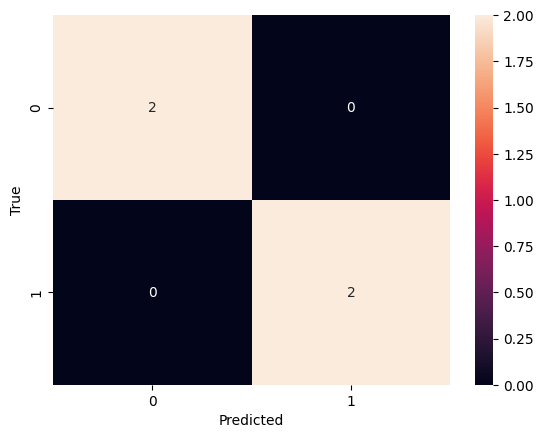

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import load_model
from sklearn.model_selection import train_test_split

# Load the saved model
model = load_model('mmodelfinal.h5')

# Assuming X_test, y_test are your test data
# Also, assuming that you have already converted y_train and y_test into one-hot encoded format

# Split the data into training and test sets
# Replace X_train, y_train, X_test, y_test with your actual data
X_train, X_test, y_train, y_test = train_test_split(Final, y, test_size=0.2, random_state=42)

# Evaluate the model on the test set
evaluation = model.evaluate(X_test, y_test)

# Extract the evaluation metrics
loss = evaluation[0]
accuracy = evaluation[1]

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Get predictions on the test set
y_pred = model.predict(X_test)

# Convert one-hot encoded to class labels
y_true_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_true_labels, y_pred_labels))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true_labels, y_pred_labels))

# Plot confusion matrix (optional)
import seaborn as sns
sns.heatmap(confusion_matrix(y_true_labels, y_pred_labels), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#**Testing Model on a Test Video**

In [ ]:
%cd /content/Badminton_Shot_Identification/utils

/content/Badminton_Shot_Identification/utils


In [ ]:
!gdown "https://drive.google.com/uc?id=1or8ILvJFSPgM5wJp7pSXgTfKP9kkJPe2&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1or8ILvJFSPgM5wJp7pSXgTfKP9kkJPe2&confirm=t
To: /content/Badminton_Shot_Identification/utils/plots.py
100% 22.8k/22.8k [00:00<00:00, 58.1MB/s]


In [ ]:
!gdown "https://drive.google.com/uc?id=1hAiV9pE-i7VT3THEsp6zIvxu6Rom_cUA&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1hAiV9pE-i7VT3THEsp6zIvxu6Rom_cUA&confirm=t
To: /content/Badminton_Shot_Identification/utils/coco.names
100% 621/621 [00:00<00:00, 3.14MB/s]


In [ ]:
%cd /content/Badminton_Shot_Identification

/content/Badminton_Shot_Identification


In [ ]:
!gdown "https://drive.google.com/uc?export=download&id=11y_MKHyIdq5v2cNbRAEVZ0kJ527WL0F9"

Downloading...
From (original): https://drive.google.com/uc?export=download&id=11y_MKHyIdq5v2cNbRAEVZ0kJ527WL0F9
From (redirected): https://drive.google.com/uc?export=download&id=11y_MKHyIdq5v2cNbRAEVZ0kJ527WL0F9&confirm=t&uuid=f2d7399c-e160-4cbb-abe6-7d7eb6ecbdcc
To: /content/Badminton_Shot_Identification/badminton_shot_identification_and_counts.py
100% 26.5k/26.5k [00:00<00:00, 70.8MB/s]


In [ ]:
!gdown "https://drive.google.com/uc?export=download&id=1C8FkqOYih2PqYLGnaw5KrAPYltRUP39R"

Downloading...
From: https://drive.google.com/uc?export=download&id=1C8FkqOYih2PqYLGnaw5KrAPYltRUP39R
To: /content/Badminton_Shot_Identification/smashx.mp4
100% 262k/262k [00:00<00:00, 4.45MB/s]


In [ ]:
!python badminton_shot_identification_and_counts.py --source="Smash4.mp4" --device='0'

2024-02-29 11:02:34.843005: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 11:02:34.843062: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 11:02:34.844547: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-29 11:02:36.220660: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
I0000 00:00:1709204557.750586   33128 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
W0000 00:00:1709204557.750681   33128 gl_context_egl.cc:184] Creating a context with OpenGL ES 3 failed: UNKNOWN: ; eglChooseConfig(

In [ ]:
# !pip install mediapipe opencv-python-headless matplotlib torch torchvision tensorflow
# !pip install -U kaleido
#Importing All the Required Libraries*
import cv2
import time
import torch
import argparse
import numpy as np
from utils.datasets import letterbox
from utils.torch_utils import select_device
from models.experimental import attempt_load
from utils.plots import output_to_keypoint, plot_skeleton_kpts, plot_one_box_kpt, colors
from utils.general import non_max_suppression_kpt, strip_optimizer
from torchvision import transforms
import tensorflow
from PIL import ImageFont, ImageDraw, Image
from google.colab.patches import cv2_imshow
#Creating an Empty Dictionary, to save the to shot count of each type of stroke
# The first element in the dictionary is the  key, which contains the shot type
# The second element in the dictionary is the value, which contains the shot count of each of the stroke
# for example ForeHandGroundStroke is played by the player 10 times
# while the Backhand Ground Stroke is played by the player 4 times.

import math
import mediapipe as mp
import matplotlib.pyplot as plt

import plotly.express as px
# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose

# Setting up the Pose function.
posee = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils

output_image = np.zeros((100, 100, 3), dtype=np.uint8)
output_image[:, :] = [0, 0, 255]  # Set color to red
object_counter = {}

import pandas as pd
import plotly.graph_objects as go

_PRESENCE_THRESHOLD = 0.5
_VISIBILITY_THRESHOLD = 0.5


def plot_landmarks(
    landmark_list,
    connections=None,
):
    if not landmark_list:
        return
    plotted_landmarks = {}
    for idx, landmark in enumerate(landmark_list.landmark):
        if (
            landmark.HasField("visibility")
            and landmark.visibility < _VISIBILITY_THRESHOLD
        ) or (
            landmark.HasField("presence") and landmark.presence < _PRESENCE_THRESHOLD
        ):
            continue
        plotted_landmarks[idx] = (-landmark.z, landmark.x, -landmark.y)
    if connections:
        out_cn = []
        num_landmarks = len(landmark_list.landmark)
        # Draws the connections if the start and end landmarks are both visible.
        for connection in connections:
            start_idx = connection[0]
            end_idx = connection[1]
            if not (0 <= start_idx < num_landmarks and 0 <= end_idx < num_landmarks):
                raise ValueError(
                    f"Landmark index is out of range. Invalid connection "
                    f"from landmark #{start_idx} to landmark #{end_idx}."
                )
            if start_idx in plotted_landmarks and end_idx in plotted_landmarks:
                landmark_pair = [
                    plotted_landmarks[start_idx],
                    plotted_landmarks[end_idx],
                ]
                out_cn.append(
                    dict(
                        xs=[landmark_pair[0][0], landmark_pair[1][0]],
                        ys=[landmark_pair[0][1], landmark_pair[1][1]],
                        zs=[landmark_pair[0][2], landmark_pair[1][2]],
                    )
                )
        cn2 = {"xs": [], "ys": [], "zs": []}
        for pair in out_cn:
            for k in pair.keys():
                cn2[k].append(pair[k][0])
                cn2[k].append(pair[k][1])
                cn2[k].append(None)

    df = pd.DataFrame(plotted_landmarks).T.rename(columns={0: "z", 1: "x", 2: "y"})
    df["lm"] = df.index.map(lambda s: mp_pose.PoseLandmark(s).name).values
    fig = (
        px.scatter_3d(df, x="z", y="x", z="y", hover_name="lm")
        .update_traces(marker={"color": "red"})
        .update_layout(
            margin={"l": 0, "r": 0, "t": 0, "b": 0},
            scene={"camera": {"eye": {"x": 2.1, "y": 0, "z": 0}}},
        )
    )
    fig.add_traces(
        [
            go.Scatter3d(
                x=cn2["xs"],
                y=cn2["ys"],
                z=cn2["zs"],
                mode="lines",
                line={"color": "black", "width": 5},
                name="connections",
            )
        ]
    )

    return fig

def detectPose(image, posee, display=True):
    '''
    This function performs pose detection on an image.
    Args:
        image: The input image with a prominent person whose pose landmarks needs to be detected.
        pose: The pose setup function required to perform the pose detection.
        display: A boolean value that is if set to true the function displays the original input image, the resultant image,
                 and the pose landmarks in 3D plot and returns nothing.
    Returns:
        output_image: The input image with the detected pose landmarks drawn.
        landmarks: A list of detected landmarks converted into their original scale.
    '''

    # Create a copy of the input image.
    output_image = image.copy()

    # Convert the image from BGR into RGB format.
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform the Pose Detection.
    results = posee.process(imageRGB)

    # Retrieve the height and width of the input image.
    height, width, _ = image.shape

    # Initialize a list to store the detected landmarks.
    landmarks = []
    %matplotlib inline
    # Check if any landmarks are detected.
    if results.pose_landmarks:

        # Draw Pose landmarks on the output image.
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS)

        # Iterate over the detected landmarks.
        for landmark in results.pose_landmarks.landmark:

            # Append the landmark into the list.
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                                  (landmark.z * width)))

    # Check if the original input image and the resultant image are specified to be displayed.
    # if display:

        # Display the original input image and the resultant image.
        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');

        # Also Plot the Pose landmarks in 3D.
        # mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        # mp_drawing = mp.solutions.drawing_utils
        fig=plot_landmarks(
        results.pose_world_landmarks,  mp_pose.POSE_CONNECTIONS)
        # cv2_imshow(image)
        fig.write_image('ajaAns.png', engine='kaleido', width=800, height=600)

        # fig.savefig('graph_image.png')
        # Save the plot as an image file (e.g., PNG)
        plt.savefig('graph_image.png')
        # cv2_imshow(plt)
    # Otherwise
    # else:

        # Return the output image and the found landmarks.
        return output_image, landmarks


#Creating a Function  by the name load_classes,using this function we will load the coco.names file and read each
#of the object name, in the coco.names file and this function will return all the object names in the coco.names
#file in the form of a list
def load_classes(path):
    # Loads *.names file at 'path'
    with open(path, 'r') as f:
        names = f.read().split('\n')
    return list(filter(None, names))  # filter removes empty strings (such as last line)

#This is the main function, here we are passing the yolov7 pose weights, by default we are setting the deivce as CPU
#setting the line thick ness of the skeleton lines as well

@torch.no_grad()
def run(poseweights='yolov7-w6-pose.pt', source='Smash4.mp4', device='cpu', names = 'utils/coco.names', line_thickness = 2):

    path = source
    ext = path.split('/')[-1].split('.')[-1].strip().lower()
    if ext in ["mp4", "webm", "avi"] or ext not in ["mp4", "webm", "avi"] and ext.isnumeric():
        input_path = int(path) if path.isnumeric() else path
        device = select_device(opt.device)
        names = load_classes(names)
        half = device.type != 'cpu'
        model = attempt_load(poseweights, map_location=device)
        _ = model.eval()

        cap = cv2.VideoCapture(input_path)
        webcam = False

        if (cap.isOpened() == False):
            print('Error while trying to read video. Please check path again')

        fw, fh = int(cap.get(3)), int(cap.get(4))
        if ext.isnumeric():
            webcam = True
            fw, fh = 1280, 768
        vid_write_image = letterbox(
            cap.read()[1], (fw), stride=64, auto=True)[0]

        resize_height, resize_width = vid_write_image.shape[:2]
        out_video_name = "output" if path.isnumeric(
        ) else f"{input_path.split('/')[-1].split('.')[0]}"
        out = cv2.VideoWriter(f"{out_video_name}_wed.mp4", cv2.VideoWriter_fourcc(
            *'mp4v'), 30, (resize_width, resize_height))
        if webcam:
            out = cv2.VideoWriter(f"{out_video_name}_mon.mp4", cv2.VideoWriter_fourcc(
                *'mp4v'), 30, (fw, fh))

        frame_count, total_fps = 0, 0

        # =3.0===Load custom font ===========
        fontpath = "sfpro.ttf"
        font = ImageFont.truetype(fontpath, 32)
        # ===================================

        # ==4.0=== Load trained pose-indentification model======
        tf_model = tensorflow.keras.models.load_model('mmodelfinal.h5')
        # ==================================================

        # == 5.0 == variable declaration===========
        sequence = []
        keypoints = []
        pose_name = ''
        posename_list = []
        actions = np.array(['Drop_Shot', 'Smash_Shot'])
        label_map = {label: num for num, label in enumerate(actions)}
        j = 1
        seq = 15
        isImage=0

        # =============================================
        while cap.isOpened:

            print(f"Frame {frame_count} Processing")
            ret, frame = cap.read()
            temp_frame =  frame
            if ret:
                #First, we will do for the Player 2
                origimage = frame
                #Creating a Black Mask
                mask=np.zeros(frame.shape[:2] , dtype="uint8")
                #Setting the ROI for the Player 2
                roi = cv2.rectangle(mask, (297, 378), (997, 702),(255,255,255), -1)
                #Overlapping the Mask on the Original Image
                masked=cv2.bitwise_and(frame,frame,mask=mask)
                masked[np.where((masked==[0,0,0]).all(axis=2))]=[255,0,0]
                orig_image = masked

                # preprocess image
                image_ = cv2.cvtColor(origimage, cv2.COLOR_BGR2RGB)
                image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)
                image_ = letterbox(image_, (resize_width), stride=64, auto=True)[0]

                image = letterbox(image, (resize_width), stride=64, auto=True)[0]
                image__ = image_.copy()
                image___ = image.copy()
                image_ = transforms.ToTensor()(image_)
                image = transforms.ToTensor()(image)
                image_ = torch.tensor(np.array([image_.numpy()]))
                image = torch.tensor(np.array([image.numpy()]))
                image_ = image_.to(device)
                image_ = image_.float()
                image = image.to(device)
                image = image.float()
                start_time = time.time()


                ###Player1 Starts From Here
                origimage2 = frame
                #Creating a Black Mask
                mask2=np.zeros(frame.shape[:2] , dtype="uint8")
                #Setting the Region of Interest for the Player 1
                roi = cv2.rectangle(mask2, (350, 260), (926, 383),(255,255,255), -1)
                #Overlapping the Mask on the Original Image
                masked2=cv2.bitwise_and(frame,frame,mask=mask2)
                masked2[np.where((masked2==[0,0,0]).all(axis=2))]=[255,0,0]
                orig_image2 = masked2

                # preprocess image
                image_2 = cv2.cvtColor(origimage2, cv2.COLOR_BGR2RGB)
                image2 = cv2.cvtColor(orig_image2, cv2.COLOR_BGR2RGB)

                image_2 = letterbox(image_2, (resize_width), stride=64, auto=True)[0]

                image2 = letterbox(image2, (resize_width), stride=64, auto=True)[0]
                image__2 = image_2.copy()
                image___2 = image2.copy()
                image_2 = transforms.ToTensor()(image_2)
                image2 = transforms.ToTensor()(image2)
                image_2 = torch.tensor(np.array([image_2.numpy()]))
                image2 = torch.tensor(np.array([image2.numpy()]))
                image_2 = image_2.to(device)
                image_2 = image_2.float()
                image2 = image2.to(device)
                image2 = image2.float()
                start_time = time.time()

                with torch.no_grad():
                    output, _ = model(image)
                    output2, _ = model(image2)
                output_data = non_max_suppression_kpt(output, 0.25, 0.65, nc=model.yaml['nc'], nkpt=model.yaml['nkpt'], kpt_label=True)
                output = output_to_keypoint(output_data)
                output_data2 = non_max_suppression_kpt(output2, 0.25, 0.65, nc=model.yaml['nc'], nkpt=model.yaml['nkpt'], kpt_label=True)
                output2 = output_to_keypoint(output_data2)

                img_ = image_[0].permute(1, 2, 0) * 255
                img_ = img_.cpu().numpy().astype(np.uint8)

                img_img = cv2.cvtColor(img_, cv2.COLOR_RGB2BGR)

                img = image[0].permute(1, 2, 0) * 255
                img = img.cpu().numpy().astype(np.uint8)

                img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
                img_2 = image_2[0].permute(1, 2, 0) * 255
                img_2 = img_2.cpu().numpy().astype(np.uint8)

                img_img2 = cv2.cvtColor(img_2, cv2.COLOR_RGB2BGR)
                height, width,_ = img_img2.shape
                img2 = image2[0].permute(1, 2, 0) * 255
                img2 = img2.cpu().numpy().astype(np.uint8)

                img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)
                #Plotting the Skeleton Keypoints on the Player 1
                for idx in range(output2.shape[0]):
                    plot_skeleton_kpts(img_img2, output2[idx, 7:].T, 3)
                    break

                gn = torch.tensor(img.shape)[[1, 0, 1, 0]]  # normalization gain whwh

                temp_frame = cv2.flip(temp_frame, 1)

                # Get the width and height of the frame
                frame_height, frame_width, _ = temp_frame.shape

                # Resize the frame while keeping the aspect ratio.
                temp_frame = cv2.resize(temp_frame, (int(frame_width * (640 / frame_height)), 640))

                # Convert the frame to a suitable depth format (e.g., CV_8U)
                temp_frame = cv2.convertScaleAbs(temp_frame)

                top_left = (200, 300)
                bottom_right = (880, 800)

                # cv2_imshow(frame)
                  # Extracting the region of interest from the frame
                temp_frame = temp_frame[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]

                for i, pose in enumerate(output_data):  # detections per image

                    if len(output_data):  #check if no pose
                        for c in pose[:, 5].unique(): # Print results
                            n = (pose[:, 5] == c).sum()  # detections per class
                            print("No of Objects in Current Frame : {}".format(n))

                        for det_index, (*xyxy, conf, cls) in enumerate(reversed(pose[:,:6])): #loop over poses for drawing on frame
                            c = int(cls)  # integer class
                            kpts = pose[det_index, 6:]
                            label = names[c]
                            #This function will create a bounding box and assign a label to the player 2
                            plot_one_box_kpt(xyxy, img_img2, label=label, color=colors(c, True),
                                        line_thickness=opt.line_thickness, kpts=kpts, steps=3,
                                        orig_shape=img.shape[:2])
                            # == 6.0 === preprocess model input data and pose prediction =======
                            #1.So now, each video frame was fed into the YOLOv7 Pose Estimation Model
                            #and predicted Key points Landmarks (X-coordinate, Y-coordinate and confidence) were extracted
                            # 2. and stacked together as a sequence of 30 frames.
                            #Here we will plot the skeleton keypoints on the Player 2
                            output_image,landmarks=detectPose(temp_frame, posee, display=False)
                            isImage+=1
                            if j <= seq:
                                for idx in range(output.shape[0]):
                                    kpts = output[idx, 7:].T
                                    plot_skeleton_kpts(img_img2, kpts, 3)
                                    sequence.append(kpts.tolist())
                                    break
                            list_to_use = kpts.tolist()
                            # list_to_use.append(kpts.tolist());
                            print("Hello")
                            print(list_to_use)
                            idx = 0
                            while(idx < list_to_use.length):
                              print("x: ", list_to_use[idx])
                              print("y: ", list_to_use[idx + 1])
                              print("conf: ", list_to_use[idx + 2])
                              idx += 3;
                            # So if the length of the sequence is 30, then we will do the shot prediction,
                            # that whether it is a forehand ground stroke or the backhand ground stroke
                            if len(sequence) == 15:




                                # Doing the Shot Prediction over here
                                result = tf_model.predict(np.expand_dims(sequence, axis=0))
                                pose_name = actions[np.argmax(result)]
                                #So we will save all the sequence values which we have got
                                keypoints.append(sequence)
                                #We are also saving all the Shot Names in a list as well
                                posename_list.append(pose_name)
                                print(sequence)
                                print(keypoints)
                                print(pose_name)
                                print(posename_list)
                                # So here we are saying if the shot name is not in the object counter dictionary
                                #then add the name
                                #If the shot name is already there in the object counter dictionary then just
                                #increment the counter
                                if pose_name not in object_counter:
                                  object_counter[pose_name] = 1
                                else:
                                  object_counter[pose_name] += 1
                            #And when the value of j becomes equal to the value of the sequence
                            #which we have the defined as 30, then remove all the previous values of sequence
                            #and set it as an empty list and start processing on the next frames

                            if j == seq:
                                sequence = []
                                j = 0
                            j += 1
                            break
                # =============================================================
                xstart = (fw//2)
                ystart = (fh-100)
                yend = (fh-50)
                # So After we have the shot name and the total shot count of each shot, we want to diplay them
                # in the output video so here we are just setting the UI where we want to display the Shot names and
                #the total shot count in the Output Video
                # = 7.0 == Draw prediction ==================================
                # print("super hi")


                if pose_name == "BackHand-GroundStroke":
                    cv2.line(img_img2, ((width - (width-50)),25), ((width - (width-200)),25), [85,45,255], 40)
                    cv2.putText(img_img2, "Shot Type", ((width - (width-50)),35), 0, 1, [225, 255, 255], thickness=2, lineType=cv2.LINE_AA)
                    cv2.line(img_img2, ((width - (width-50)),75), ((width - (width-500)),75), [85,45,255], 40)
                    cv2.putText(img_img2, pose_name, ((width - (width-50)),85), 0, 1, [225, 255, 255], thickness=2, lineType=cv2.LINE_AA)

                elif pose_name == "Forehand-GroundStroke":
                    cv2.line(img_img2, ((width - (width-50)),25), ((width - (width-200)),25), [85,45,255], 40)
                    cv2.putText(img_img2, "Shot Type", ((width - (width-50)),35), 0, 1, [225, 255, 255], thickness=2, lineType=cv2.LINE_AA)
                    cv2.line(img_img2, ((width - (width-50)),75), ((width - (width-500)),75), [85,45,255], 40)
                    cv2.putText(img_img2, pose_name, ((width - (width-50)),85), 0, 1, [225, 255, 255], thickness=2, lineType=cv2.LINE_AA)
                if isImage>=1:
                  print("hey")
                    # Assuming img_img2 is your video frame and pose_img is the output pose image
# Resize the pose image to a smaller size (e.g., 100x100) for better visibility
                  pose_img_resized = cv2.resize(output_image, (100, 100))

                  # Get the height and width of the resized pose image
                  pose_height, pose_width, _ = pose_img_resized.shape

                  # Define the position where you want to place the pose image (top-left corner in this example)
                  pos_x = 10
                  pos_y = 10

                  # Extract the region of interest from the video frame where you want to overlay the pose image
                  roi = img_img2[pos_y:pos_y + pose_height, pos_x:pos_x + pose_width]

                  # Create a binary mask for the pose image (convert to grayscale and threshold)
                  pose_mask = cv2.cvtColor(pose_img_resized, cv2.COLOR_BGR2GRAY)
                  _, pose_mask = cv2.threshold(pose_mask, 1, 255, cv2.THRESH_BINARY_INV)

                  # Invert the binary mask for the region where the pose image will be placed
                  roi_inv = cv2.bitwise_not(pose_mask)

                  # Blend the video frame and the resized pose image using the binary mask
                  img_img2_bg = cv2.bitwise_and(roi, roi, mask=roi_inv)
                  pose_img_fg = cv2.bitwise_and(pose_img_resized, pose_img_resized, mask=pose_mask)
                  result = cv2.addWeighted(img_img2_bg, 1, pose_img_fg, 1, 0)

                  # Replace the region of interest in the video frame with the blended result
                  img_img2[pos_y:pos_y + pose_height, pos_x:pos_x + pose_width] = result



                # ====================================================================
                for idx, (key, value) in enumerate(object_counter.items()):
                    cnt_str = str(key) + ":" +str(value)
                    cv2.line(img_img2, ((width-500),45), (width,45), [85,45,255], 40)

                    cv2.putText(img_img2, f'Total Shot Count', ((width-500),55), 0, 1, [225, 255, 255], thickness=2, lineType=cv2.LINE_AA)
                    cv2.line(img_img2, ((width-500), 85 + (idx*40)), (width, 85 + (idx*40)), [85, 45, 255], 30)
                    cv2.putText(img_img2, cnt_str, ((width-500), 95 + (idx*40)), 0, 1, [255, 255, 255], thickness = 2, lineType = cv2.LINE_AA)

                #Changes Made from Here

                small_image = cv2.imread('ajaAns.png')
                small_image=cv2.flip(small_image, 1)
                # Resize the small image to the desired size
                try:
                  small_image = cv2.resize(small_image, (200, 200))  # Adjust the size as needed
                except:
                  print('Error')

                # Define the position to append the small image
                x_offset_image = width-300  # Adjust the offset as needed
                y_offset_image = 20  # Adjust the offset as needed

                # Append the small image to the frame
                img_img2[y_offset_image:y_offset_image + small_image.shape[0], x_offset_image:x_offset_image + small_image.shape[1]] = small_image
                out.write(img_img2)
                # Display the updated video frame
                cv2_imshow(img_img2)
                # cv2_imshow(output_image)
                # display image
                if webcam:
                    # cv2.imshow("Detection", img)
                    key = cv2.waitKey(1)
                    if key == ord('c'):
                        break
                else:
                    img_ = img.copy()
                    img_ = cv2.resize(
                        img_, (960, 540), interpolation=cv2.INTER_LINEAR)
                    # cv2.imshow("Detection", img_img2)
                    cv2.waitKey(1)

                end_time = time.time()
                fps = 1 / (end_time - start_time)
                total_fps += fps
                frame_count += 1
                out.write(img_img2)
            else:
                break

        cap.release()
        avg_fps = total_fps / frame_count
        print(f"Average FPS: {avg_fps:.3f}")


def parse_opt():
    parser = argparse.ArgumentParser()
    parser.add_argument('--poseweights', nargs='+', type=str,
                        default='yolov7-w6-pose.pt', help='model path(s)')
    parser.add_argument('--source', type=str,
                        help='path to video or 0 for webcam')
    parser.add_argument('--device', type=str, default='cpu',
                        help='cpu/0,1,2,3(gpu)')
    parser.add_argument('--line_thickness', default = 3, help = 'Please Input the Value of Line Thickness')

    opt = parser.parse_args()
    return opt

def main(opt):
    run(**vars(opt))


opt = argparse.Namespace(poseweights='yolov7-w6-pose.pt', source='Smash4.mp4', device='cpu', line_thickness=3)
strip_optimizer(opt.device, opt.poseweights)
main(opt)


RuntimeError: PytorchStreamReader failed locating file data/6: file not found

ajaAns.png				     mmodelfinal.h5  Smash4.mp4      yolov7-w6-pose.pt
badminton_shot_identification_and_counts.py  models	     Smash4_wed.mp4
graph_image.png				     sfpro.ttf	     utils
